# Building the Network

In [1]:
import numpy as np
import pandas as pd
import networkx as nx

Subtask 1: Build an edge list from the dataframe. The edge list consists of a source and target column, which shows how users have moved between chapters in the books that form the network. So, for a single row, the source would show the previous book and chapter read and the target would show the current book and chapter being read.

In [2]:
# Load data

read_ticks_df = pd.read_csv("../datasets/dataset.csv")

read_ticks_df.head()

,user_id,number_of_ticks,date_created,chapter,book,numberofentriesofbook,numberofusersofbook,product_manning_id,user_owns_book
0,-2147277864,1,"""2019-10-27 08:58:15""",chapter-8,bhargava,888,440,610,1
1,-2146355313,8,"""2019-12-14 10:05:50""",chapter-8,fain3,737,225,1069,1
2,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,ramamurthy,715,202,1120,1
3,-2146355313,8,"""2019-12-14 10:05:50""",chapter-1,thomas,445,136,816,1
4,-2146168866,2,"""2019-11-27 05:09:29""",about-this-book,prasanna,21,14,273,0


In [3]:
# Clean Data
read_ticks_df["date_created"] = pd.to_datetime(read_ticks_df["date_created"].str.strip().str.replace('"', ''))
read_ticks_df["book_chapter"] = list(zip(read_ticks_df["book"], read_ticks_df["chapter"]))

In [4]:
read_ticks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                4999 non-null   int64         
 1   number_of_ticks        4999 non-null   int64         
 2   date_created           4999 non-null   datetime64[ns]
 3   chapter                4999 non-null   object        
 4   book                   4999 non-null   object        
 5   numberofentriesofbook  4999 non-null   int64         
 6   numberofusersofbook    4999 non-null   int64         
 7   product_manning_id     4999 non-null   int64         
 8   user_owns_book         4999 non-null   int64         
 9   book_chapter           4999 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 390.7+ KB


In [9]:
# For each user, sort the ticks based on the date created. 

EDGE_COLUMNS = ["source", "target"]

def create_edge_df(df: pd.DataFrame) -> pd.DataFrame:
    df = df.sort_values("date_created")
    if len(df) <= 1:
        # Return empty dataframe
        return pd.DataFrame([], columns=EDGE_COLUMNS)
    return pd.DataFrame(
        {
            "source": df["book_chapter"].iloc[:-1].values,
            "target": df["book_chapter"].iloc[1:].values,
        }
    )


edge_list_df = read_ticks_df.groupby("user_id").apply(create_edge_df).reset_index(0).reset_index(drop=True)

In [10]:
edge_list_df.head()

,user_id,source,target
0,-2146355313,"(fain3, chapter-8)","(ramamurthy, chapter-1)"
1,-2146355313,"(ramamurthy, chapter-1)","(thomas, chapter-1)"
2,-2145886989,"(mcnamara, chapter-4)","(mcnamara, chapter-4)"
3,-2145886989,"(mcnamara, chapter-4)","(mcnamara, chapter-1)"
4,-2145886989,"(mcnamara, chapter-1)","(mcnamara, chapter-1)"


Subtask 2: Build the network diagram from the edge list.

In [7]:
graph = nx.from_pandas_edgelist(edge_list_df, create_using=nx.DiGraph)

Subtask 3: Visualize a simple version of the network diagram to demonstrate the functioning network diagram.

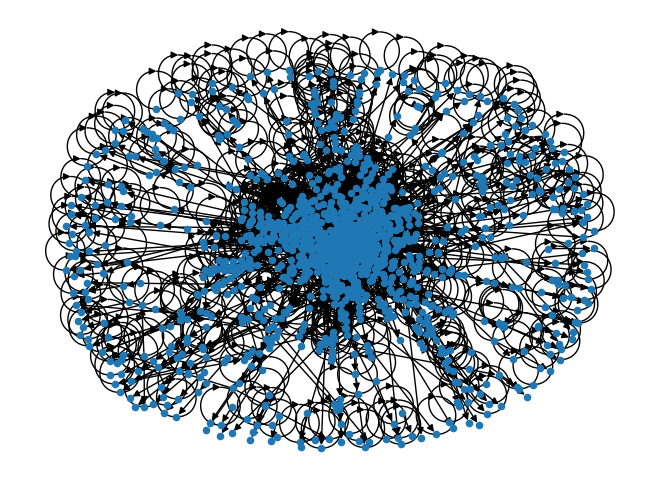

In [8]:
nx.draw(graph, node_size=20)

In [11]:
# Export Edge List

edge_list_df.to_csv("../outputs/edge_list.csv", index=False)